In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from pydataset import data
from env import get_connection

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from scipy.stats import mannwhitneyu

import acquire
import prepare

# Data Acquisition Exercises

- 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
    - print the first 3 rows
    - print the number of rows and columns (shape)
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables

In [2]:
# load data from pydataset
df_iris = data('iris')

In [3]:
# get top 3 contents of a dataframe
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# get number of rows and columns of a dataframe
df_iris.shape

(150, 5)

In [5]:
# get a list containg names of columns of a dataframe
df_iris.columns.tolist()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [6]:
# get types of data
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# get summary statistics for each of the numeric variables of data
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- 5. Read the data from this google sheet into a dataframe, df_google.
    - print the first 3 rows
    - print the number of rows and columns
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables
    - print the unique values for each of your categorical variables

In [8]:
# get the shareable link url:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
# turn google sheet url into a CSV export URL
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
# load data from csv file into a dataframe
df_google = pd.read_csv(csv_export_url)

In [9]:
# get the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
# get the number of rows and columns 
df_google.shape

(891, 12)

In [11]:
# get a list containg names of columns 
df_google.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [12]:
# get data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# get summary statistics for each of the numeric variables of data
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
# print unique values for each categorical variables
for col in df_google.columns.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare','Cabin']):
    print(col)
    print(df_google[col].value_counts(dropna=False))
    print()


Survived
0    549
1    342
Name: Survived, dtype: int64

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Embarked
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64



- 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.
    - assign the first 100 rows to a new dataframe, df_excel_sample
    - print the number of rows of your original dataframe
    - print the first 5 column names
    - print the column names that have a data type of object
    - compute the range for each of the numeric variables.

In [16]:
# load data into a dataframe from excel
df_excel = pd.read_excel('train.xlsx')
# the first 3 rows
df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
# create a new dataframe with first 100 rows of df_excel
df_excel_sample = df_excel.head(100)

In [18]:
# get the number of rows and columns of original dataframe
df_excel.shape[0]

891

In [19]:
# get the number of rows and columns of original dataframe
len(df_excel.index)

891

In [20]:
# get the number of rows and columns of original dataframe
df_excel[df_excel.columns[0]].count()

891

In [21]:
# get the first 5 column names 
df_excel_sample.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [22]:
# get the column names that have a data type of object
df_excel_sample.columns[df_excel_sample.dtypes == object]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [23]:
# get the range for each of the numeric variables
df_excel_sample.select_dtypes(exclude='object').max() - df_excel_sample.select_dtypes(exclude='object').min()

PassengerId     99.000
Survived         1.000
Pclass           2.000
Age             70.170
SibSp            5.000
Parch            5.000
Fare           255.775
dtype: float64

--------
# Data Preparation Exercises

In [24]:
import acquire

### Using the Iris Data:

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [25]:
# acquire data using funciton from acquire module
iris_df = acquire.get_iris_data()

# check top 5 contents of dataframe 
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [26]:
# drop the species_id and measurement_id columns
iris_df.drop(columns = ['species_id', 'measurement_id'], inplace=True)

In [27]:
# check if columns are dropped
iris_df.head(1)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2


In [28]:
#rename column name from  species_name to species
iris_df.rename(columns={'species_name': 'species'}, inplace=True)

In [29]:
# check if column name is changed
iris_df.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2


In [30]:
# use pd.get_dummies to get encoded version  and drop_first to drop reptative information
dummies = pd.get_dummies(iris_df['species'], drop_first=True)

In [31]:
# use pd.concat to add dummies to original dataframe
# use axis= 1 to add dummies to columns in original dataframe
iris_df = pd.concat([iris_df, dummies], axis=1)

In [32]:
# Check if dummies are added in orignal dataframe
iris_df.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0


In [33]:
# create function to accepts the original dataframe and return the transformed data
def prep_iris(df):
    
    # drop the species_id and measurement_id columns
    df.drop(columns = ['species_id', 'measurement_id'], inplace=True)
    
    #rename column name from  species_name to species
    df.rename(columns={'species_name': 'species'}, inplace=True)
    
    # use pd.get_dummies to get encoded version  and drop_first to drop reptative information
    dummies = pd.get_dummies(iris_df['species'], drop_first=True)
    
    # use pd.concat to add dummies to original dataframe, use axis= 1 to add dummies to columns in original dataframe
    df = pd.concat([df, dummies], axis=1)
    
    # return transformed dataframe
    return df

In [34]:
# acquire data using funciton from acquire module
test_iris = acquire.get_iris_data()

# peek into data of dataframe
test_iris.head(3)

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2


In [35]:
# use function to accept original dataframe and return the tranformed dataframe
clean_iris = prep_iris(test_iris)

In [36]:
# peek into data of dataframe
clean_iris.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0


### Using the Titanic dataset

- Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [37]:
# acquire data using funciton from acquire module
titanic_df = acquire.get_titanic_data()

# peek into data of dataframe
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [38]:
# get information about data frame
# The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [39]:
# check for null
titanic_df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [40]:
# drop unnecessary columns
titanic_df.drop(columns = ['class', 'embarked','deck', 'passenger_id', 'age'], inplace=True )

In [41]:
# check if columns are dropped
titanic_df.head(1)

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.25,Southampton,0


In [42]:
# fill Null values 
titanic_df['embark_town'].fillna('Southampton', inplace=True)

In [43]:
# create dummy variable 
dummies = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first=True)

In [44]:
# concate dummy varibles with dataframe
titanic_df = pd.concat([titanic_df, dummies],axis=1)

In [45]:
# Check if dummies are added in orignal dataframe
titanic_df.head(3)

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1


In [46]:
# check null values
titanic_df.isna().sum()

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
embark_town                0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [47]:
# create function to accepts the original dataframe and return the transformed data
def prep_titanic(df):
    
    # drop unnecessary columns 
    df.drop(columns = ['class', 'embarked','deck', 'passenger_id', 'age'], inplace=True )
    
    # fill Null values 
    df['embark_town'].fillna('Southampton', inplace=True)
    
    # create dummy variable
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    
    # concate dummy varibles with dataframe
    df = pd.concat([df, dummies],axis=1)

    # return transformed dataframe
    return df

In [48]:
# acquire data using funciton from acquire module
test_titanic = acquire.get_titanic_data()

# peek into data of dataframe
test_titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [49]:
# use function to accept original dataframe and return the transformed dataframe
clean_titanic = prep_titanic(test_titanic)

In [50]:
# peek into data of dataframe
clean_titanic.head(3)

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1


### Using the Telco dataset

- Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [51]:
# acquire data using funciton from acquire module
telco_df = acquire.get_telco_data()

# peek into data of dataframe
telco_df.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [52]:
# get information about data frame. 
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [53]:
# count unique values of column total charges
telco_df.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [54]:
# In column total_charges, replace white space with '0' and convert data type to float
telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0').astype(float)

In [55]:
# count unique values of column total charges
telco_df.total_charges.value_counts()

0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64

In [56]:
# create a list of columns names that will be dropped  
to_drop = ['payment_type_id', 'contract_type_id', 'internet_service_type_id','customer_id' ]

In [57]:
# drop unnecessary columns 
telco_df.drop(columns = to_drop, inplace=True)

In [58]:
# create a list of columns names to create dummies
to_dummies = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type']

In [59]:
# create dummy variable
dummies = pd.get_dummies(telco_df[to_dummies],drop_first=True)

In [60]:
# concate dummy varibles with dataframe
telco_df = pd.concat([telco_df, dummies], axis=1)

In [61]:
# Check if dummies are added in orignal dataframe
telco_df.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0


In [62]:
# create function to accepts the original dataframe and return the transformed data
def prep_telco(df):
   # create a list of columns names that will be dropped  
    to_drop = ['payment_type_id', 'contract_type_id', 'internet_service_type_id','customer_id' ]  
    
    # drop unnecessary columns 
    df.drop(columns = to_drop, inplace=True)
    
    # In column total_charges, replace white space with '0' and convert data type to float
    df.total_charges= df.total_charges.str.replace(' ','0').astype('float64')

    # create a list of columns names to create dummies
    to_dummies = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'contract_type', 'payment_type']
    
    # create dummy variable
    dummies = pd.get_dummies(df[to_dummies],drop_first=True)
    
    # concate dummy varibles with dataframe
    df = pd.concat([df, dummies],axis=1)

    # return dataframe
    return df

In [63]:
# acquire data using funciton from acquire module
test_telco = acquire.get_telco_data()

# peek into data of dataframe
test_telco.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [64]:
# use function to accept original dataframe and return the transformed dataframe
clean_telco = prep_telco(test_telco)

In [65]:
# peek into data of dataframe
clean_telco.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0


### Split your data

- 1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

- 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

- 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

- 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [66]:
# create function that takes in a dataframe and return train, validate and test dataframe; stratify on target
def train_validate_test_split(df, target, seed=42):
    
    # split data into 80% train_validate, 20% test
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    
    # split train_validate data into 70% train, 30% validate
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    # return train, validate, test
    return train, validate, test

In [67]:
# use function train_validate_test_split to return 3 datasets: train_iris, validate_iris and test_iris.
iris_train, iris_validate, iris_test = train_validate_test_split(iris_df, target='species')

# get shape of train, validate and test data
iris_train.shape, iris_validate.shape, iris_test.shape

((84, 7), (36, 7), (30, 7))

In [68]:
# use function train_validate_test_split to return 3 datasets: train_titanic, validate_titanic and test_titanic
titanic_train, titanic_validate, titanic_test = train_validate_test_split(titanic_df, target='survived')

# get shape of train, validate and test data
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 11), (214, 11), (179, 11))

In [69]:
# use function train_validate_test_split to return 3 datasets: train_telco, validate_telco and test_telco
telco_train, telco_validate, telco_test = train_validate_test_split(telco_df, target='churn')

# get shape of train, validate and test data
telco_train.shape, telco_validate.shape, telco_test.shape

((3943, 47), (1691, 47), (1409, 47))

-----
# Exploratory Analysis Exercises

## - Part 1
## 1. Acquire, prepare & split your data.

In [70]:
# acquire data using funciton from acquire module
iris = acquire.get_iris_data()

# peek into data of dataframe
iris.head(3)

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2


In [71]:
# clean data using function from prepare module
clean_iris = prepare.prep_iris(iris)

# drop unwanted columns
clean_iris.drop(columns = ['versicolor', 'virginica'],inplace=True)

# peek into data of dataframe
clean_iris.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2


In [72]:
# get train, validate and test data using function from prepare module
train_iris, validate_iris, test_iris = prepare.train_validate_test_split(clean_iris, 'species')

# get shape of train, validate and test data
train_iris.shape, validate_iris.shape, test_iris.shape

((84, 5), (36, 5), (30, 5))

## 2. Univariate Stats

### - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

### - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

### - Document takeaways & any actions.

In [73]:
# identify and separate numerical and categorical variable

# num_vars = train_iris.select_dtypes(exclude='object')
num_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

cat_vars = ['species']
# cat_vars = train_iris.select_dtypes(include='object')


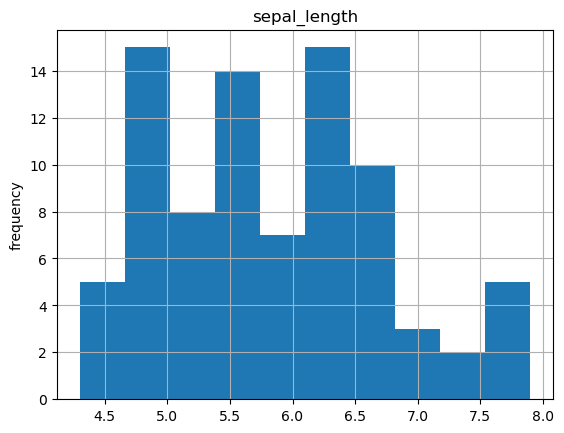

count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64



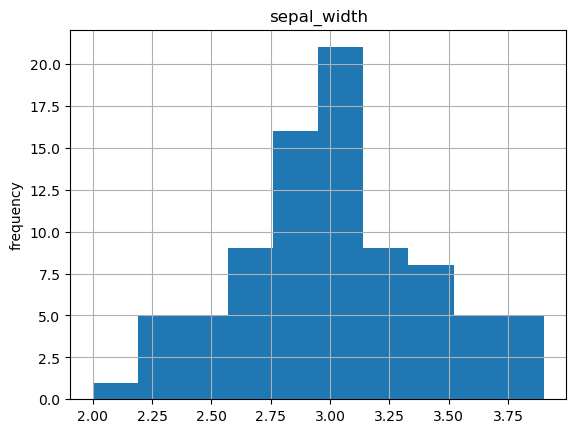

count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64



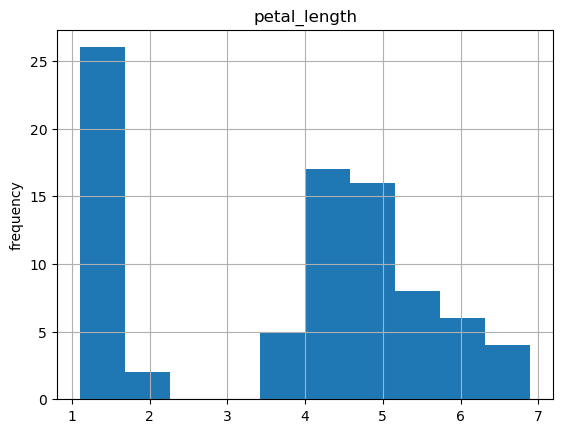

count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64



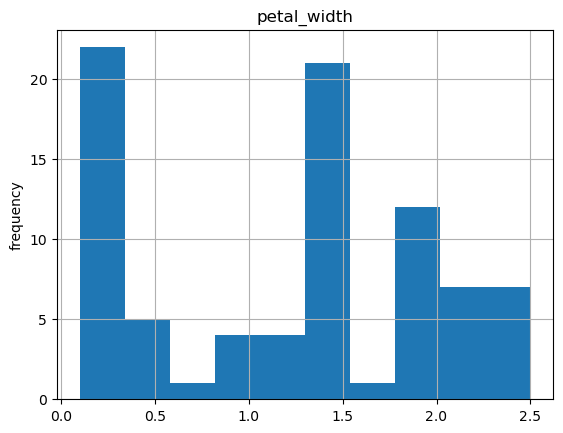

count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64



In [74]:
# quantitative variable
#  create histogram
for col in num_vars:
    train_iris[col].hist()
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()
    print(train_iris[col].describe())
    print()
   

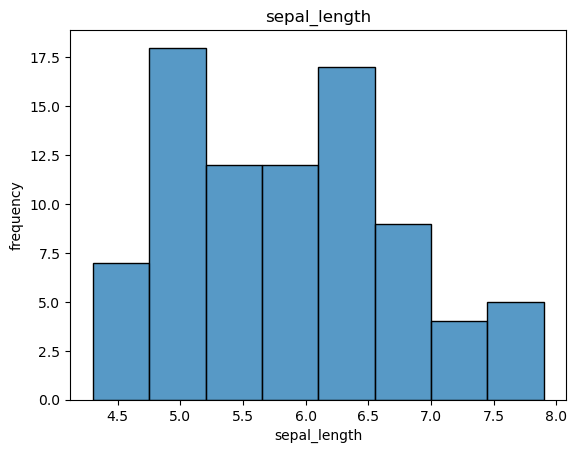

count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64



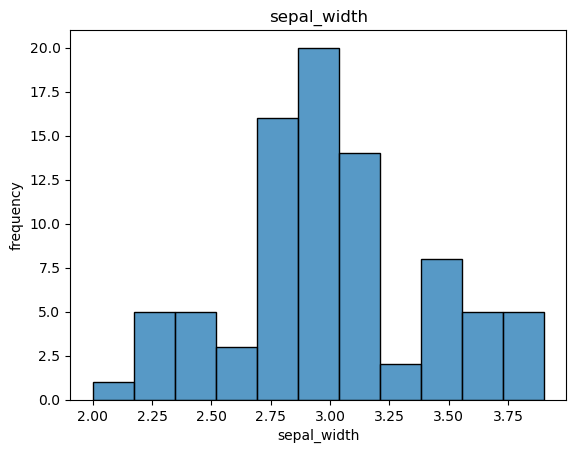

count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64



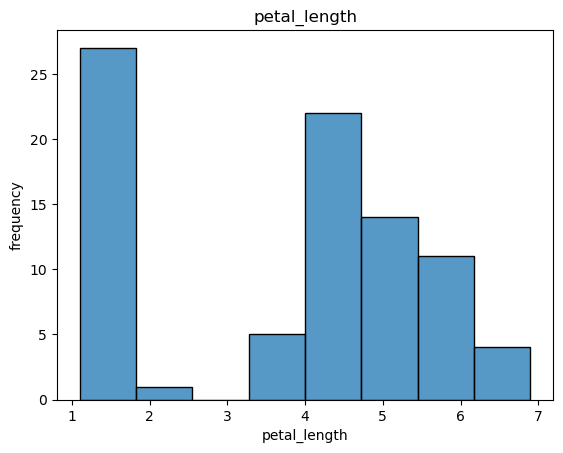

count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64



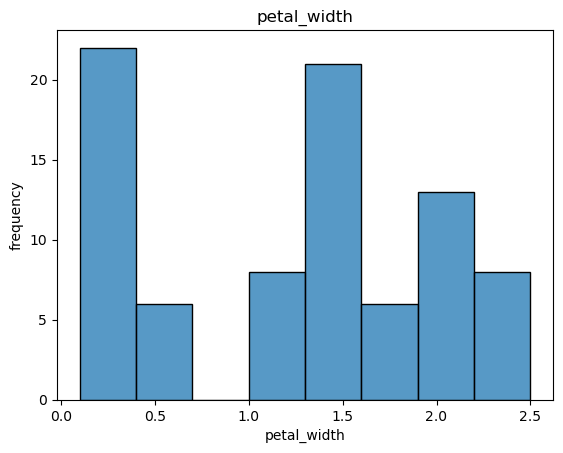

count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64



In [75]:
# quantitative variable
#  create histogram 
for col in num_vars:
    sns.histplot(x =col, data=train_iris)
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()
    print(train_iris[col].describe())
    print()
  

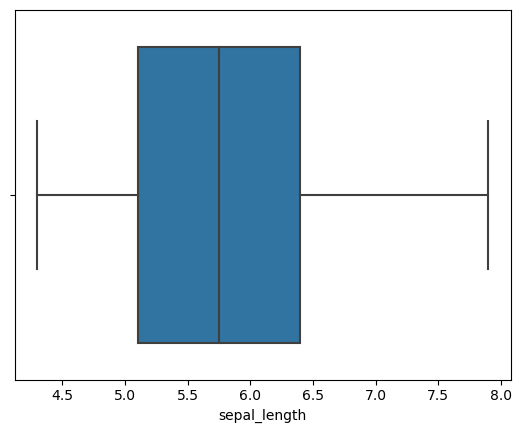

count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64



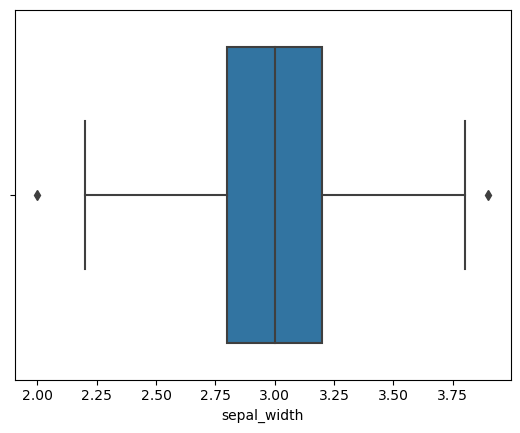

count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64



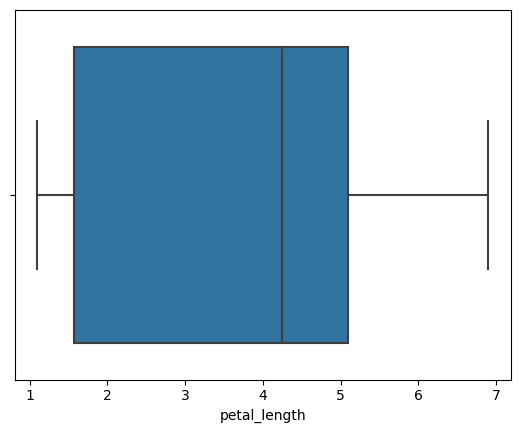

count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64



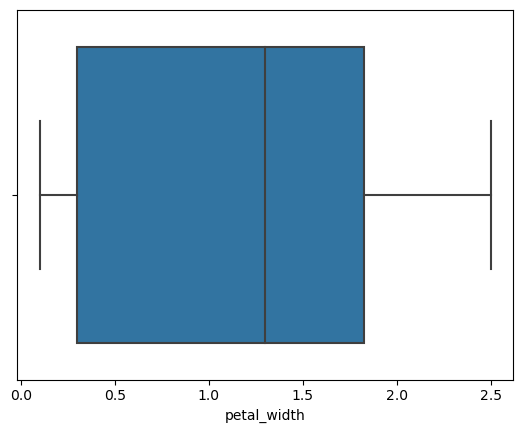

count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64



In [76]:
# quantitative variable
#  create boxplot
for col in num_vars:
    sns.boxplot(x=col, data=train_iris)
    plt.show()
    print(train_iris[col].describe())
    print()

virginica     33.333333
versicolor    33.333333
setosa        33.333333
Name: species, dtype: float64


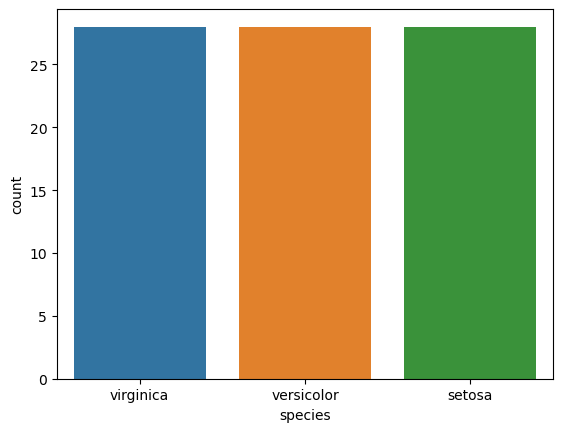

In [77]:
#categorical variable
# create countplot
for col in cat_vars:
    print(train_iris[col].value_counts(normalize=True)* 100)
    sns.countplot(x=col, data=train_iris)
    plt.show()
   
   

### Takeways:
- sepal length and sepal width are normally distributed

- sepal width has outliers of 2 and 3.9

## 3. Bivariate Stats
### - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

### - For each measurement type, compute the descriptive statistics for each species.

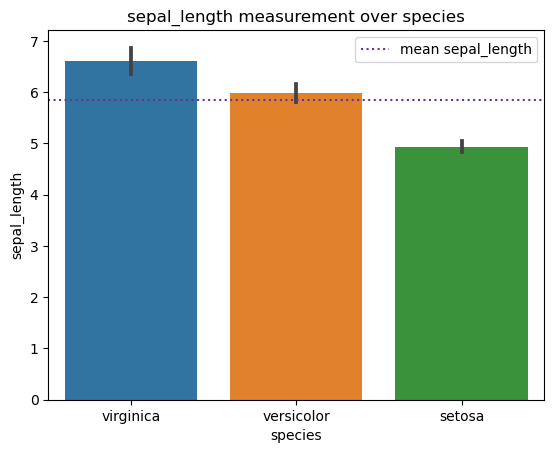

count    84.000000
mean      5.846429
std       0.872808
min       4.300000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
_____________________________________________________________________________



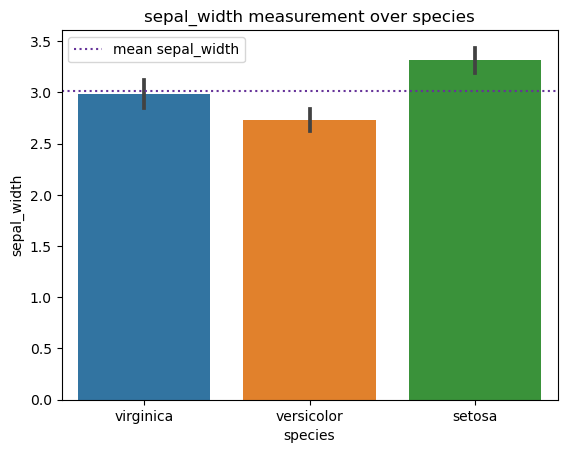

count    84.000000
mean      3.010714
std       0.413046
min       2.000000
25%       2.800000
50%       3.000000
75%       3.200000
max       3.900000
Name: sepal_width, dtype: float64
_____________________________________________________________________________



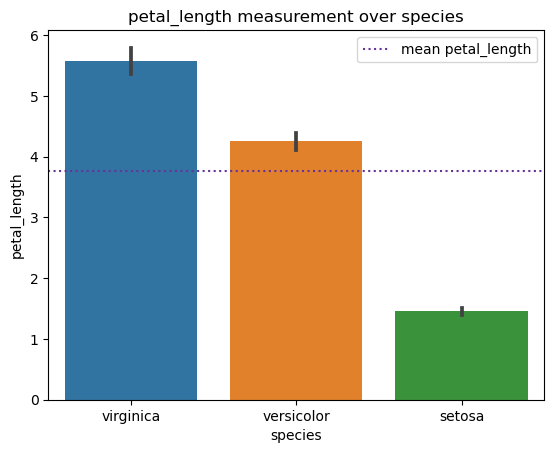

count    84.000000
mean      3.759524
std       1.777647
min       1.100000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
_____________________________________________________________________________



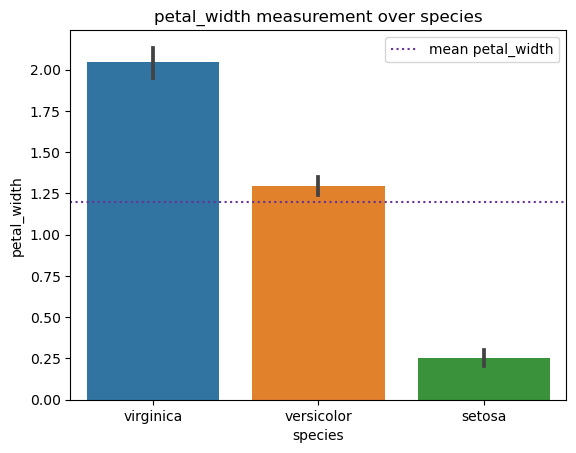

count    84.000000
mean      1.196429
std       0.760698
min       0.100000
25%       0.300000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64
_____________________________________________________________________________



species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    4.939286    5.989286   6.610714
             std     0.296072    0.484072   0.734514
             min     4.300000    5.000000   4.900000
             25%     4.775000    5.675000   6.275000
             50%     5.000000    5.900000   6.600000
             75%     5.100000    6.300000   7.125000
             max     5.500000    7.000000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.317857    2.732143   2.982143
             std     0.348599    0.303136   0.363169
             min     2.300000    2.000000   2.500000
             25%     3.100000    2.600000   2.775000
             50%     3.350000    2.800000   3.000000
             75%     3.525000    2.925000   3.200000
             max     3.900000    3.200000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.453571    4.253571   5.571429
             std     0.162121    0.380528   0.609102
             min     1.100000    3.500000   4.500000
             25%     1.375000    4.000000   5.100000
             50%     1.450000    4.250000   5.550000
             75%     1.525000    4.525000   5.925000
             max     1.900000    4.900000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.250000    1.296429   2.042857
             std     0.123228    0.155116   0.239488
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.875000
             50%     0.200000    1.300000   2.050000
             75%     0.300000    1.400000   2.225000
             max     0.600000    1.500000   2.500000

In [78]:
# create bar plot
for col in num_vars:
    plt.title(f'{col} measurement over species')
    sns.barplot(x="species", y=col, data=train_iris)
    col_mean = train_iris[col].mean()
    plt.axhline(col_mean, label=f'mean {col}', color='rebeccapurple', linestyle='dotted')
    plt.legend()
    plt.show()
    print(train_iris[col].describe())
    print("_____________________________________________________________________________\n" )

train_iris.groupby('species').describe().T

### Takeaways: 

- sepal_length: lognest- Virginica, shortest-Setosa

- sepal_width: longest- Setosa, shortest- Versicolor

- petal_length: longest- Virginica, shortest- Setosa

- petal_width: longest- Virginica, shortest- Setosa

- setosa can be easily distinguished by petal length and petal width

### - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

#### Hypothesis¶
- $𝐻_{𝑂 }$: mean of petal width of virginica and versicolor is not different

- $𝐻_{𝑎}$ : mean of petal width of virginica and versicolor is different

In [79]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
131,virginica,7.9,3.8,6.4,2.0
59,versicolor,5.2,2.7,3.9,1.4
108,virginica,6.7,2.5,5.8,1.8
82,versicolor,5.8,2.7,3.9,1.2
40,setosa,5.0,3.5,1.3,0.3


In [80]:
#set alpha 
alpha = 0.05

In [81]:
# run mannwhitneyu test
stat, p_value = mannwhitneyu(train_iris[train_iris.species=='virginica'].petal_width, 
                          train_iris[train_iris.species=='versicolor'].petal_width)
stat, p_value 

(781.5, 1.4587742069536832e-10)

In [82]:
# compare p_value:
if p_value < alpha:
    print("We Rejected Null Hypothesis")
else:
    print("We failed to reject Null Hypothesis")

We Rejected Null Hypothesis


### Takeaways:

- mean of petal width of virginica and versicolor is different

## 4. Multivariate Stats
### - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

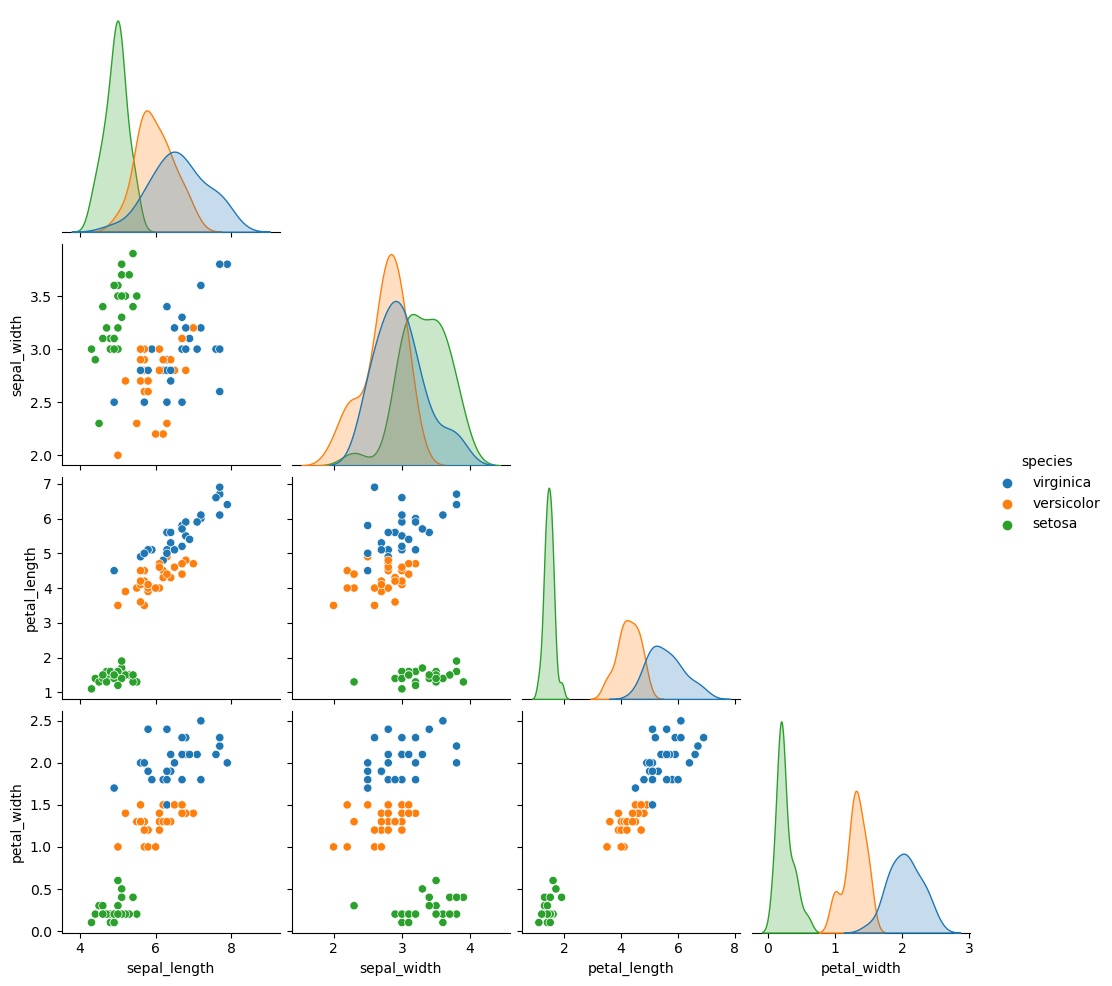

In [83]:
sns.pairplot(data = train_iris, hue='species', corner=True) # corner=True removes repitation

### Takeaways:

- petal_length and petal width can be used to distingush setosa from the otherr. 

- Setosa has the shortest petal_length and petal_width

- virginica has the longest petal_length and petal_width


### - Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

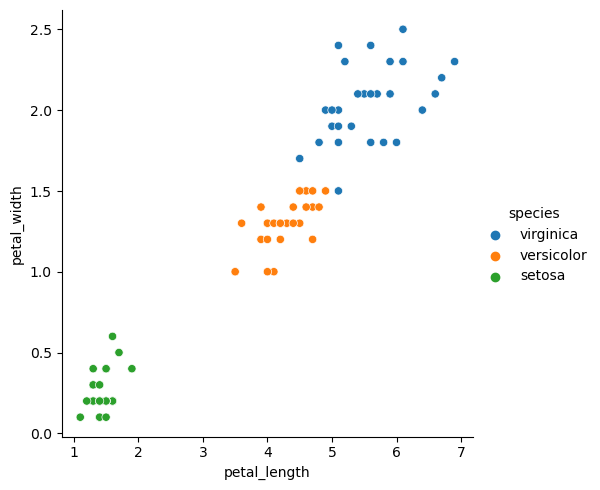

In [84]:
sns.relplot(x='petal_length', y='petal_width', hue='species', data=train_iris)

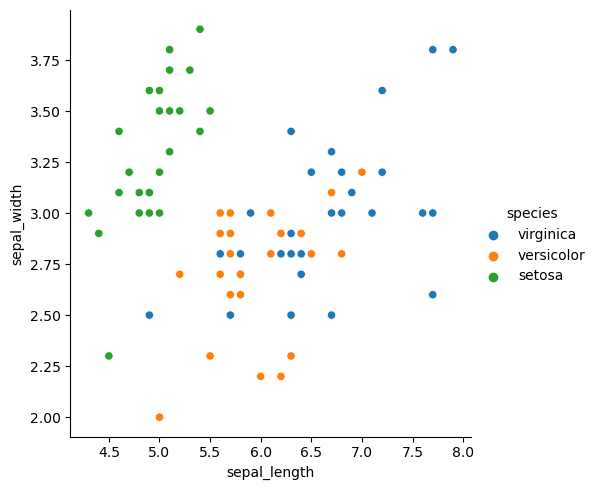

In [85]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=train_iris)

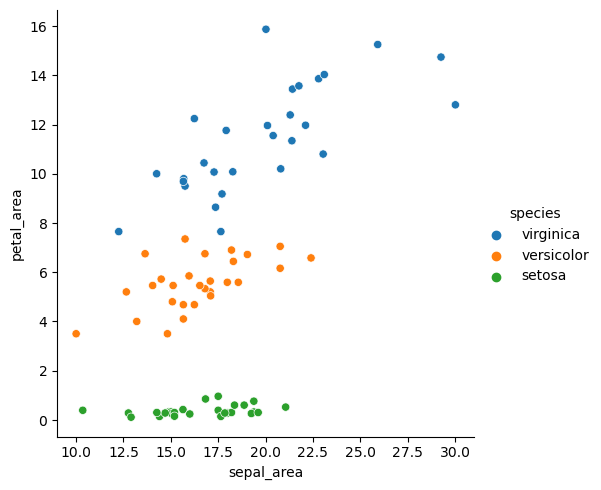

In [86]:
train_iris['sepal_area'] = train_iris.sepal_length * train_iris.sepal_width
train_iris['petal_area'] = train_iris.petal_length * train_iris.petal_width

sns.relplot(x='sepal_area', y='petal_area', hue='species', data=train_iris)

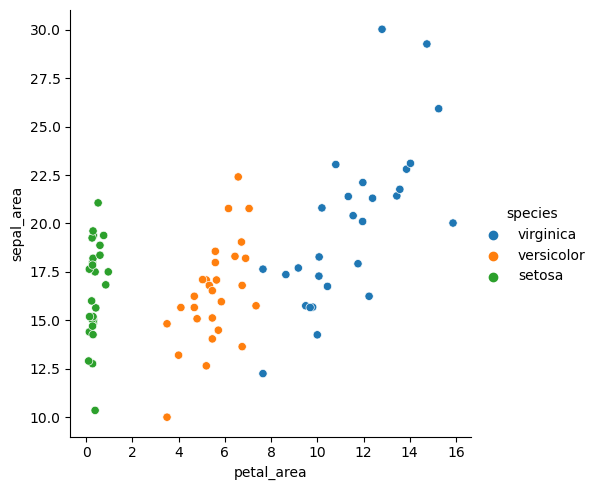

In [87]:
sns.relplot(x='petal_area', y='sepal_area', hue='species', data=train_iris)

### - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [88]:
train_iris.drop(columns='sepal_area',inplace=True)
melted = train_iris.melt(id_vars = ['species'], var_name='measure', value_name= 'values')
melted.head()

,species,measure,values
0,virginica,sepal_length,7.9
1,versicolor,sepal_length,5.2
2,virginica,sepal_length,6.7
3,versicolor,sepal_length,5.8
4,setosa,sepal_length,5.0


In [89]:
# melted.measure.value_counts()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categoric

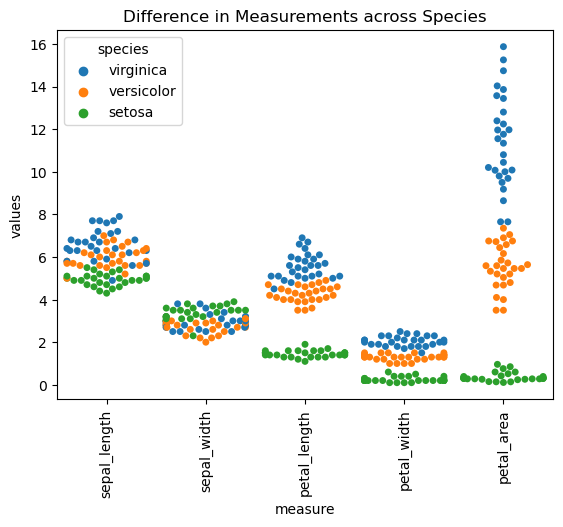

In [90]:
sns.swarmplot(x='measure', y='values', data=melted, hue='species')
plt.xticks(rotation=90)
plt.title('Difference in Measurements across Species')
plt.show()

### - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [91]:
train_setosa = train_iris[train_iris.species== 'setosa' ]
train_virginica = train_iris[train_iris.species== 'virginica' ]

In [92]:
train_setosa_sepal_area = train_setosa.sepal_length * train_setosa.sepal_width
train_virginica_sepal_area = train_virginica.sepal_length * train_virginica.sepal_width

In [93]:
train_setosa_area= train_setosa_sepal_area.tolist()
train_virginica_area = train_virginica_sepal_area.tolist()

In [94]:
setosa_df = pd.DataFrame({'setosa': train_setosa_area, 'virginica': train_virginica_area})

<AxesSubplot:>

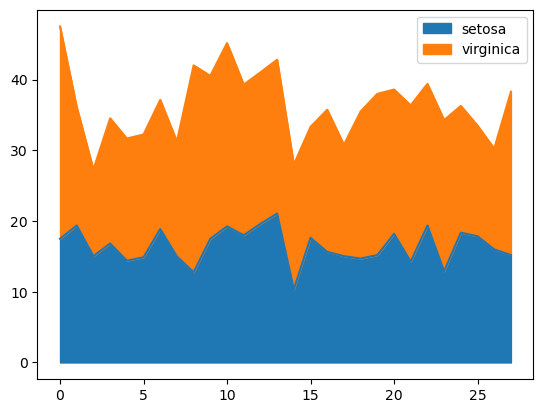

In [95]:
setosa_df.plot.area()

### Hypothesis

- $H_{O}$: Sepal area of virginica is not different than speal area of setosa

- $H_{a}$: sepal area of virginica is different than sepal area of setosa

In [96]:
stat, p_value = mannwhitneyu(train_virginica_sepal_area, train_setosa_sepal_area)
stat, p_value

(592.0, 0.0010777670619209008)

In [97]:
# set alpha
alpha = 0.05
# compare p_value:
if p_value < alpha:
    print("We Rejected Null Hypothesis")
else:
    print("We failed to reject Null Hypothesis")

We Rejected Null Hypothesis


### Takeaways: 

- petal length and petal width can be used to distinguish setosa from the others, and can be helpful for the other 2.
- Setosa has the shortest petal length and width.
- Virginica has the longest of both of those.
- Sepal length can also help separate virginica and versicolor, as virginica is slightly shorter.
- Virginica and versicolor overlap in sepal width.
- Sepal area does not seem to add any value beyond what sepal_length already added.

### Part II

- Explore your titanic dataset more completely.

- Determine drivers of the target variable

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

- Does it make sense to combine any features?

- Do you find any surprises?

- Document any and all findings and takeaways in your notebook using markdown.

In [98]:
# acquire data using funciton from acquire module
titanic = acquire.get_titanic_data()

# peek into data of dataframe
titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [99]:
# clean data using funciton form prepare module
clean_titanic = prepare.prep_titanic(titanic)

In [100]:
# peek into data of dataframe
clean_titanic.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [101]:
# split data using funciton form prepare module 
train_titanic, validate_titanic, test_titanic = prepare.train_validate_test_split(titanic, 'survived')

# get shape of train, validate and test data
train_titanic.shape, validate_titanic.shape, test_titanic.shape

((498, 8), (214, 8), (179, 8))

In [102]:
# get values counts of each column except fare
for col in train_titanic.columns: 
    if col != 'fare':
        print(col)
        print(train_titanic[col].value_counts())
        print()

survived
0    307
1    191
Name: survived, dtype: int64

pclass
3    272
1    117
2    109
Name: pclass, dtype: int64

sex
male      320
female    178
Name: sex, dtype: int64

sibsp
0    344
1    113
2     17
4     10
3      7
8      4
5      3
Name: sibsp, dtype: int64

parch
0    375
1     65
2     48
5      4
4      3
3      2
6      1
Name: parch, dtype: int64

embark_town
Southampton    360
Cherbourg      102
Queenstown      36
Name: embark_town, dtype: int64

alone
1    300
0    198
Name: alone, dtype: int64



In [103]:
# get information of data
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 779 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     498 non-null    int64  
 1   pclass       498 non-null    int64  
 2   sex          498 non-null    object 
 3   sibsp        498 non-null    int64  
 4   parch        498 non-null    int64  
 5   fare         498 non-null    float64
 6   embark_town  498 non-null    object 
 7   alone        498 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 35.0+ KB


In [104]:
# create a list categorical variables
cat_vars = ['pclass','sex', 'sibsp', 'parch', 'embark_town', 'alone']

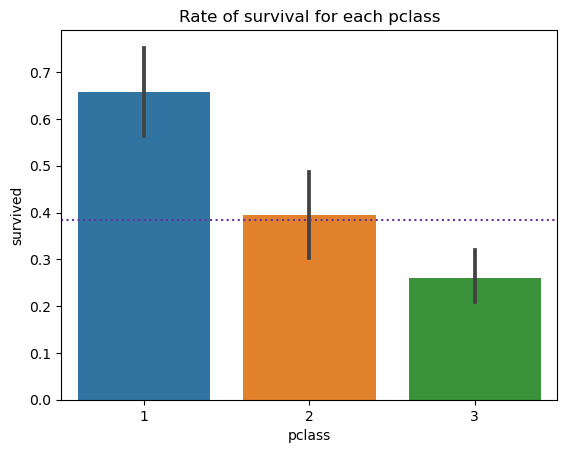

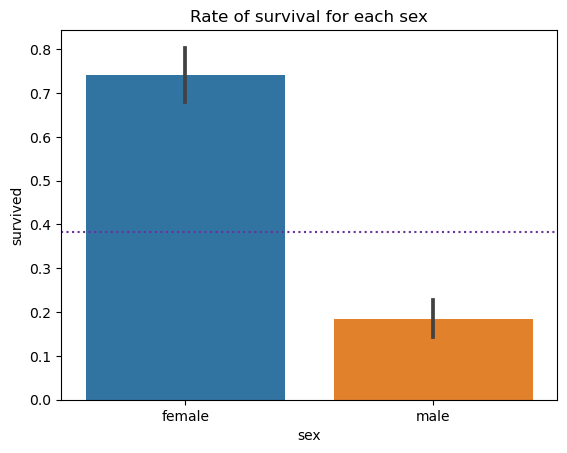

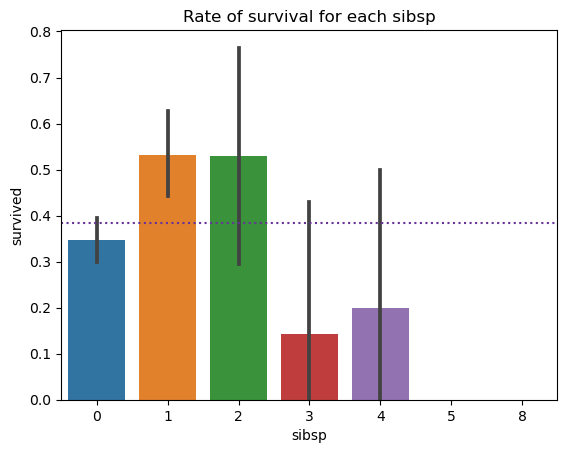

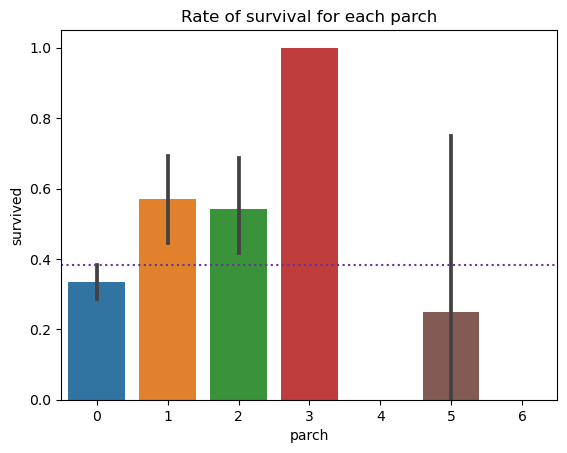

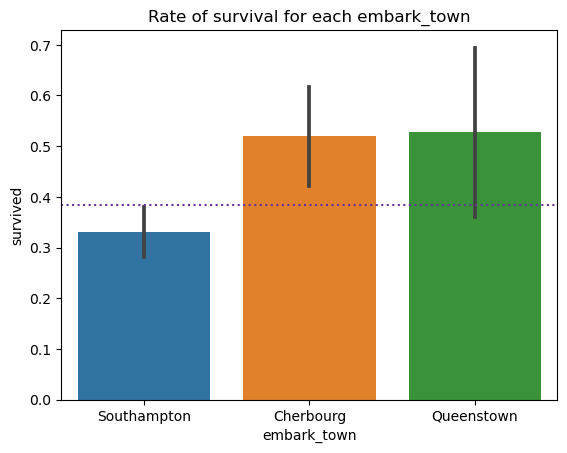

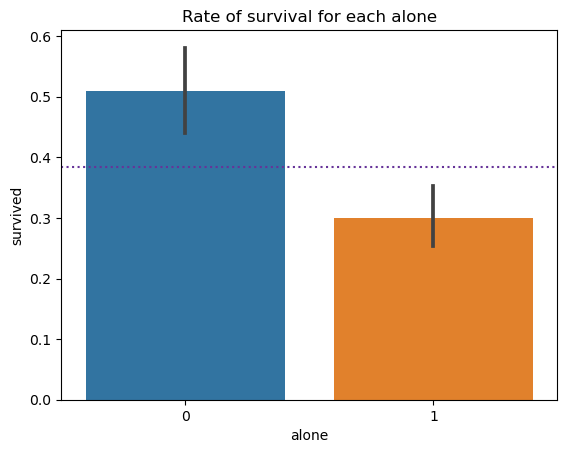

In [105]:
# visualization of categorical variables with survived
for col in cat_vars:
    sns.barplot(x=col, y='survived', data=train_titanic)
    survival_rate = train_titanic.survived.mean()
    # add horizontal line with the overall survived rate
    plt.axhline(survival_rate, label='survival rate', color='rebeccapurple', linestyle='dotted')
    plt.title(f'Rate of survival for each {col}')
    plt.show()

-----
### Part III

- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.

- What are your drivers of churn?

- Does it make sense to combine any features?

- Do you find any surprises?

- Document any and all findings and takeaways in your notebook using markdown.

In [106]:
# acquire data using funciton from acquire module
telco_initial_df = acquire.get_telco_data()

# peek into data of dataframe
telco_initial_df.head(3)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check


In [107]:
# clean data using funciton form prepare module
clean_telco_df = prepare.prep_telco(telco_initial_df)

In [108]:
# peek into data of dataframe
clean_telco_df.head(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,0,0,1,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,1,0,0,0,0,1,0


In [109]:
# check data types
clean_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   phone_service                          7043 non-null   object 
 6   multiple_lines                         7043 non-null   object 
 7   online_security                        7043 non-null   object 
 8   online_backup                          7043 non-null   object 
 9   device_protection                      7043 non-null   object 
 10  tech_support                           7043 non-null   object 
 11  stre

In [110]:
# create a list with categorical variables
cat_vars = clean_telco.select_dtypes(include='object').drop(columns='churn').columns.tolist()
# cat_vars

In [111]:
# create a list without categorical variables
num_vars = ['tenure', 'monthly_charges', 'total_charges']
# num_vars

In [112]:
# split data using funciton form prepare module 
train_telco, validate_telco, test_telco = prepare.train_validate_test_split(clean_telco, 'churn')

# get shape of train, validate and test data
train_telco.shape, validate_telco.shape, test_telco.shape


((3943, 47), (1691, 47), (1409, 47))

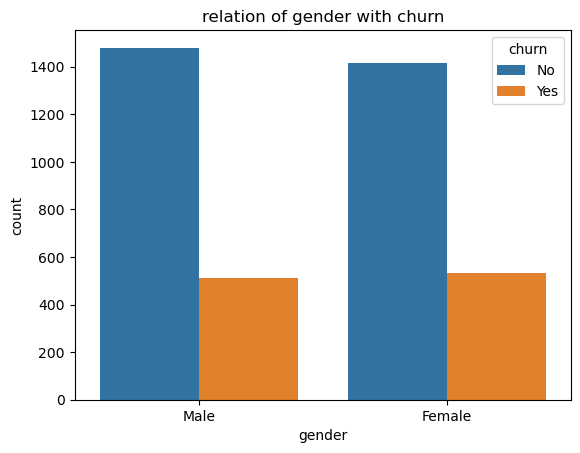

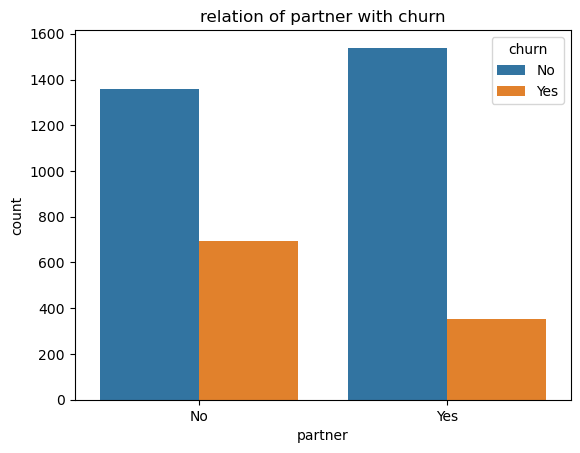

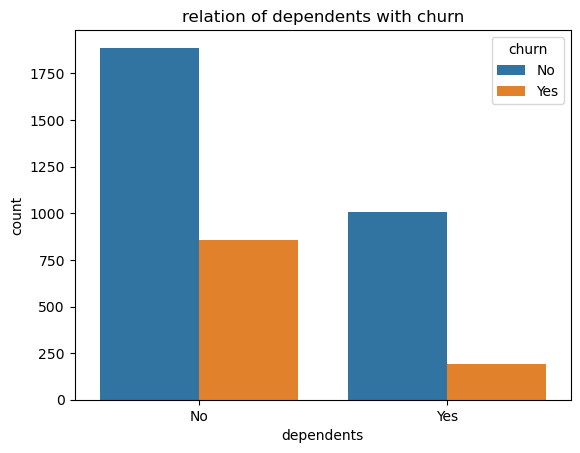

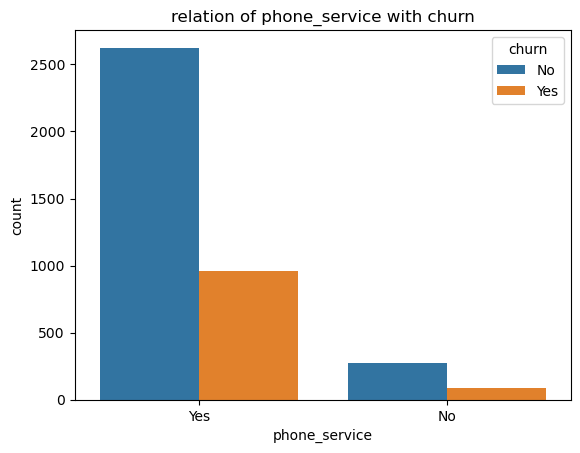

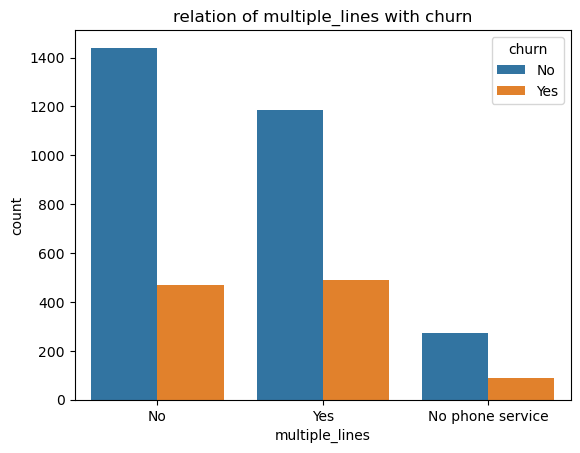

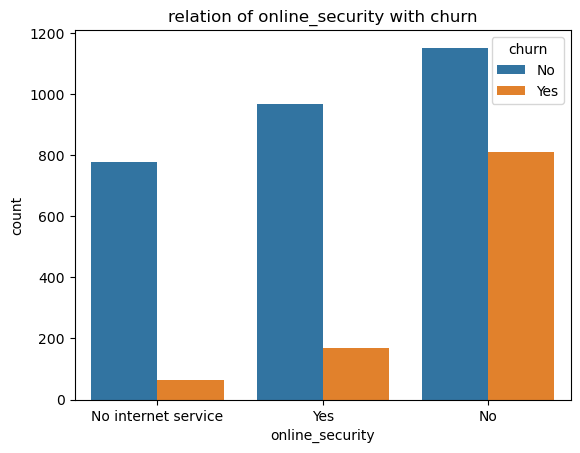

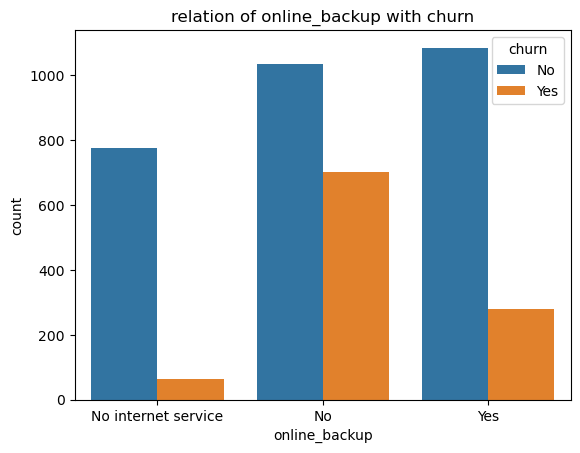

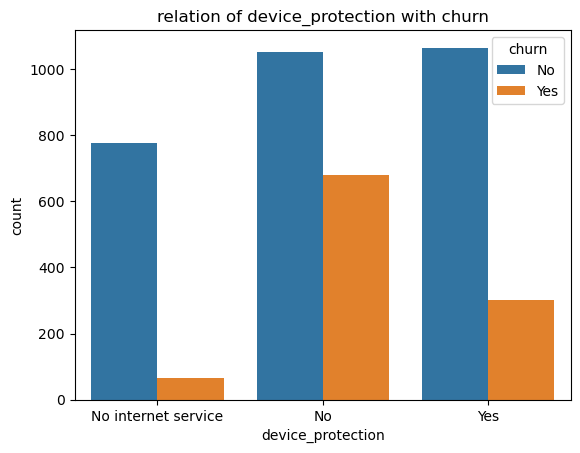

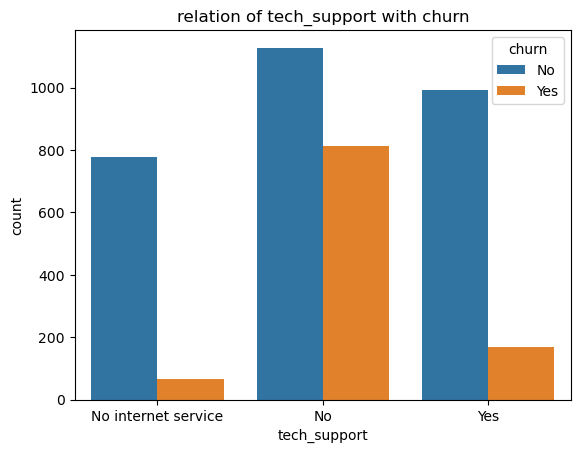

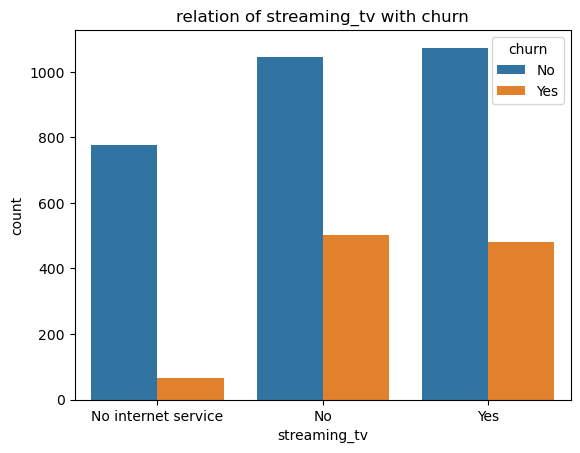

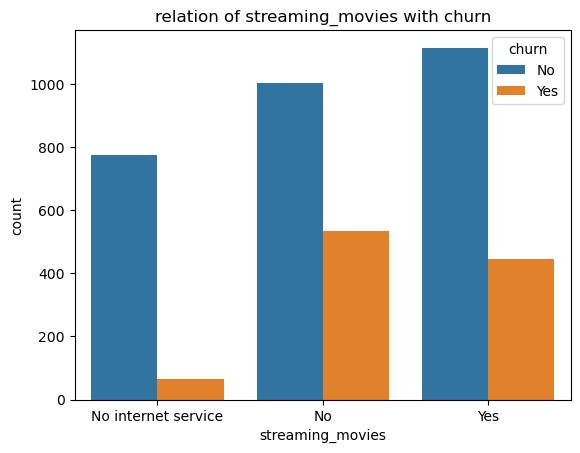

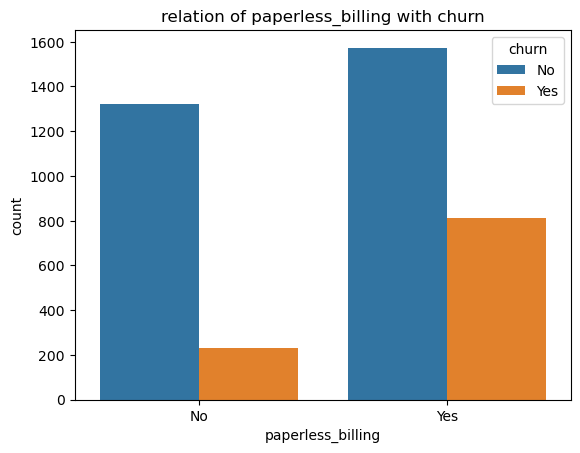

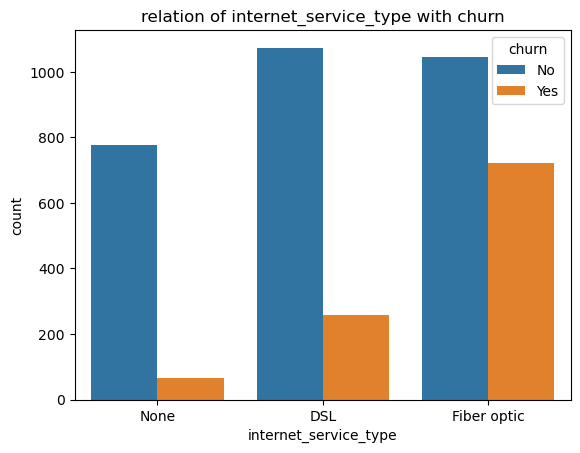

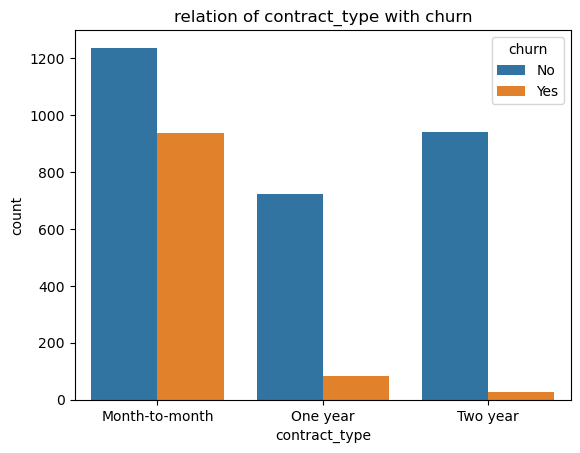

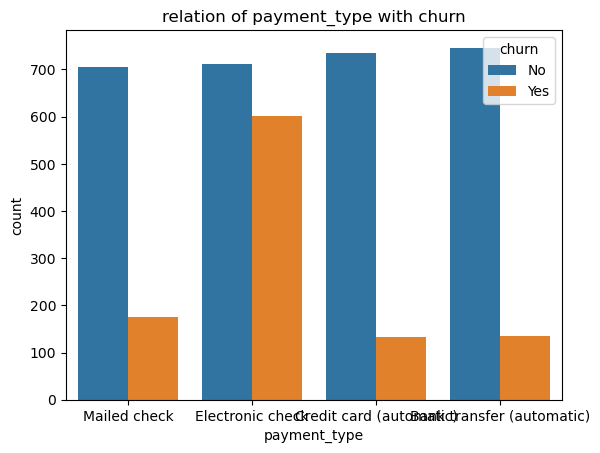

In [113]:
# visualization of categorical varibles relation with churn
for col in cat_vars:
    sns.countplot(x=col, data=train_telco, hue='churn')
    plt.title(f'relation of {col} with churn')
    plt.show()
   

tenure


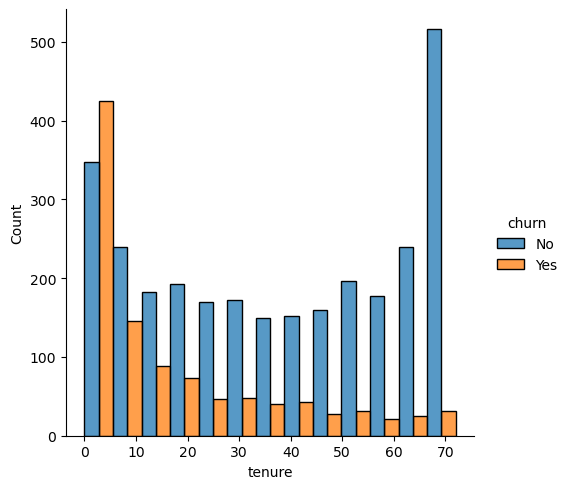

monthly_charges


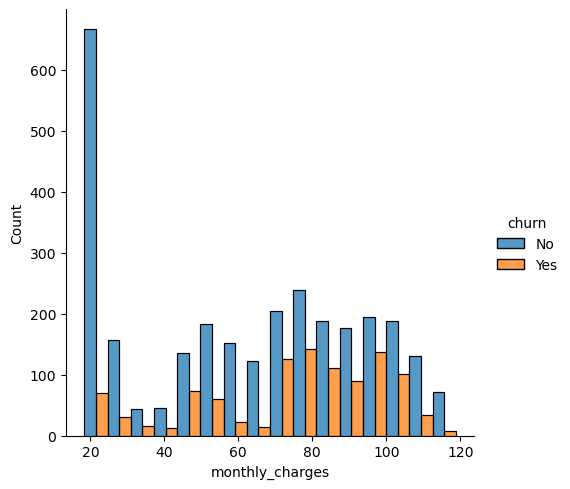

total_charges


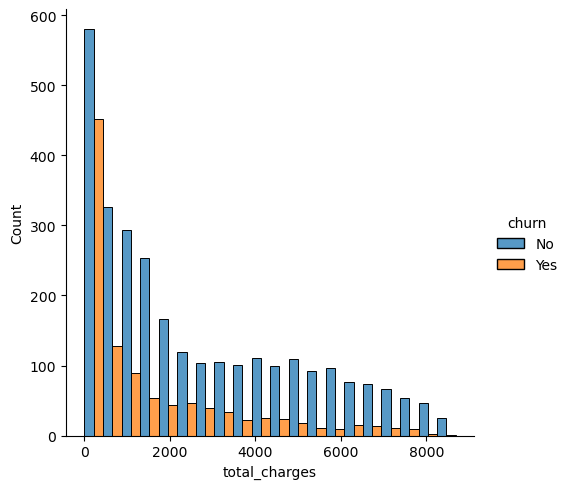

In [114]:
# visualization of numerical varibles relation with churn
for col in num_vars:
    print(col)
    sns.displot(x =col, data=train_telco, hue='churn', multiple="dodge")
    plt.show()

### Does the total_charges effect the churn?'

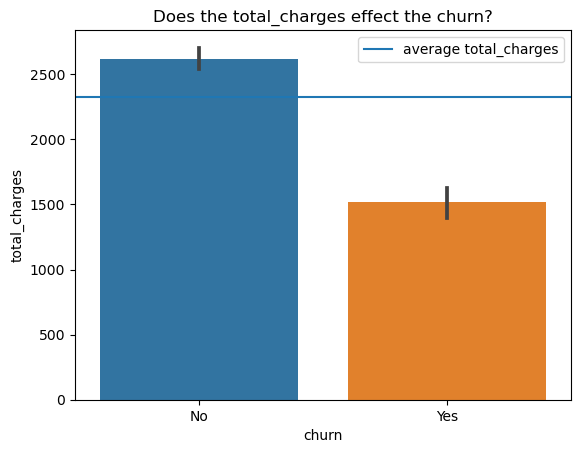

In [115]:
plt.title('Does the total_charges effect the churn?')
sns.barplot(y='total_charges', x='churn', data=train_telco)
total_charges_rate = train_telco.total_charges.mean()
plt.axhline(total_charges_rate, label = 'average total_charges')
plt.legend()

### Does the monthly_charges effect the churn?

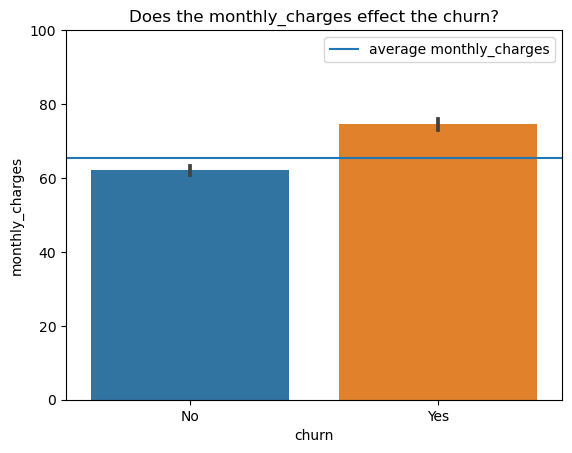

In [116]:
plt.title('Does the monthly_charges effect the churn?')
sns.barplot(y='monthly_charges', x='churn', data=train_telco)
plt.ylim(0,100)
monthly_charges_rate = train_telco.monthly_charges.mean()
plt.axhline(monthly_charges_rate, label = 'average monthly_charges')
plt.legend()

### Does the tenure effect the churn?

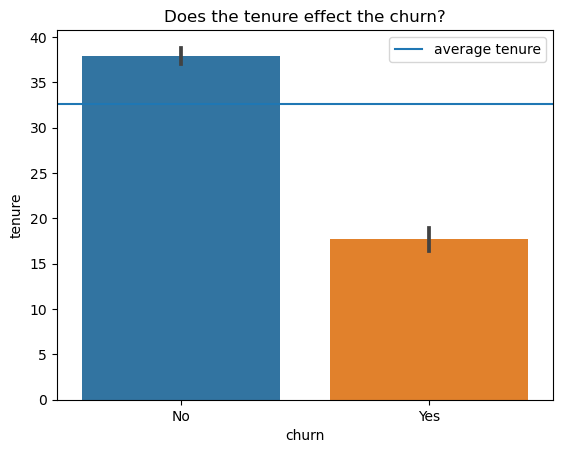

In [117]:
plt.title('Does the tenure effect the churn?')
sns.barplot(y='tenure', x='churn', data=train_telco)
tenure_rate = train_telco.tenure.mean()
plt.axhline(tenure_rate, label = 'average tenure')
plt.legend()